Task 1: Exploratory Data Analysis (EDA) and Business Insights

In [1]:
import pandas as pd

# Load the datasets
customers_path = '/Users/aman_r/Desktop/Data Science Assignment/DataSets/Customers.csv'
products_path = '/Users/aman_r/Desktop/Data Science Assignment/DataSets/Products.csv'
transactions_path = '/Users/aman_r/Desktop/Data Science Assignment/DataSets/Transactions.csv'

customers = pd.read_csv(customers_path)
products = pd.read_csv(products_path)
transactions = pd.read_csv(transactions_path)

# Displaying the first few rows of each dataset for an initial understanding
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()

# Checking data summaries for insights into structure and potential issues
customers_info = customers.info()
products_info = products.info()
transactions_info = transactions.info()

# Display the initial exploration results
customers_head, products_head, transactions_head, customers_info, products_info, transactions_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

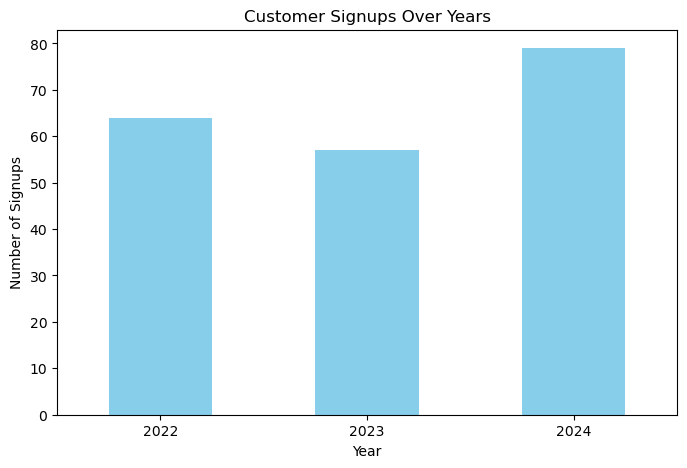

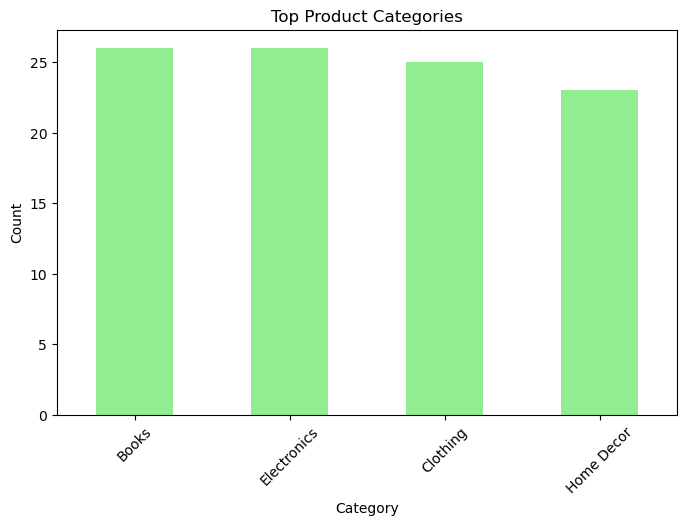

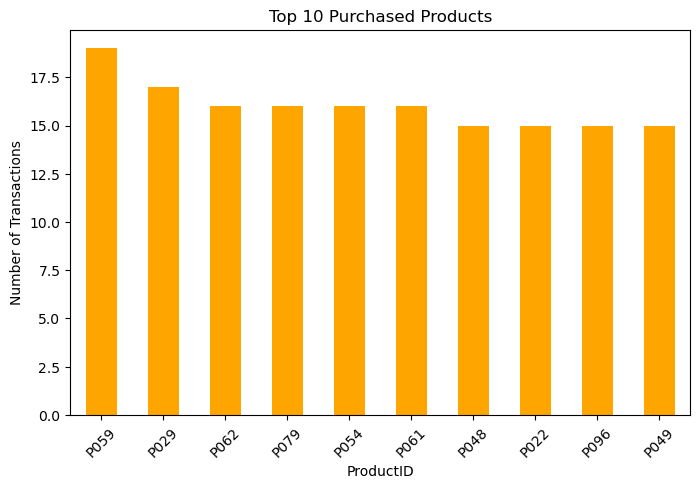

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Overview of data: Checking distributions and trends

# Customer signups over time
customer_signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()

# Top categories by count in the Products dataset
top_categories = products['Category'].value_counts()

# Most frequently purchased products in Transactions
top_products = transactions['ProductID'].value_counts().head(10)

# Plotting trends and distributions

# Customer signup trend
plt.figure(figsize=(8, 5))
customer_signup_trend.plot(kind='bar', color='skyblue')
plt.title('Customer Signups Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=0)
plt.show()

# Top categories
plt.figure(figsize=(8, 5))
top_categories.plot(kind='bar', color='lightgreen')
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top purchased products
plt.figure(figsize=(8, 5))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Purchased Products')
plt.xlabel('ProductID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

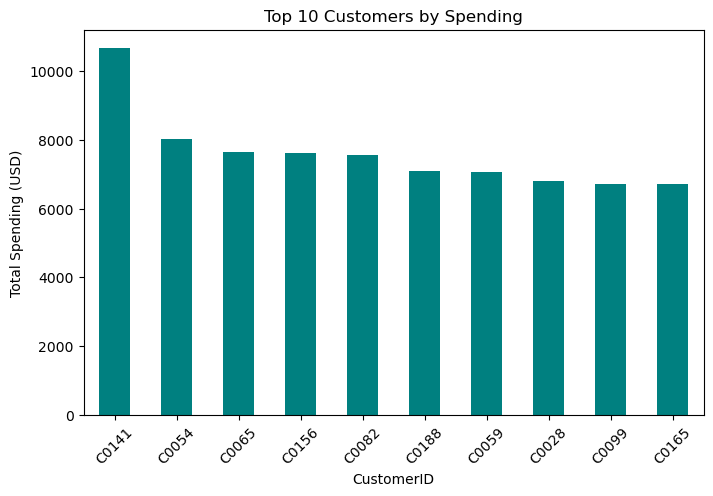

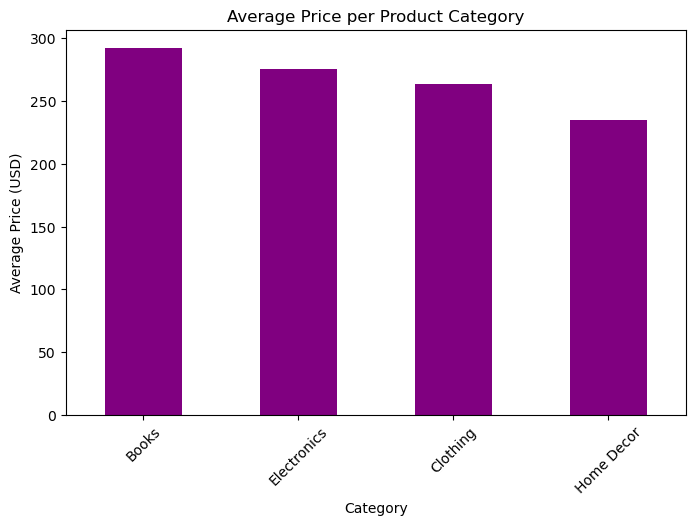

In [3]:
# Additional Analysis: Customer Spending Patterns and Product Pricing Trends

# Total spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Average price of products per category
average_price_per_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Plotting customer spending patterns
plt.figure(figsize=(8, 5))
customer_spending.plot(kind='bar', color='teal')
plt.title('Top 10 Customers by Spending')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

# Plotting average product prices per category
plt.figure(figsize=(8, 5))
average_price_per_category.plot(kind='bar', color='purple')
plt.title('Average Price per Product Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()